In [1]:
from pynsee import *

import difflib
import geopandas as gpd
import numpy
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

In [2]:
get_dimension_list().to_csv("sirene_dimensions.csv")

Getting legal entities: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]



!!! This function may return personal data, please check and
 comply with the legal framework relating to personal data protection !!!


Getting legal entities: 100%|██████████| 1/1 [00:00<00:00, 10305.42it/s]


In [3]:
# get activity list
naf5 = get_activity_list('NAF5')
naf5.to_csv("naf.csv")
naf5[naf5["NAF5"].str.contains("^86.2")]

,A10,A129,A17,A21,A38,A5,A64,A88,NAF1,NAF2,NAF3,NAF4,NAF5,TITLE_NAF5_40CH_FR,TITLE_NAF5_65CH_FR,TITLE_NAF5_FR
664,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.21,86.21Z,Activité des médecins généralistes,Activité des médecins généralistes,Activité des médecins généralistes
665,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.22,86.22A,Act. radiodiagnostic et de radiothérapie,Activités de radiodiagnostic et de radiothérapie,Activités de radiodiagnostic et de radiothérapie
666,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.22,86.22B,Activités chirurgicales,Activités chirurgicales,Activités chirurgicales
667,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.22,86.22C,Autre activité des médecins spécialistes,Autres activités des médecins spécialistes,Autres activités des médecins spécialistes
668,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.23,86.23Z,Pratique dentaire,Pratique dentaire,Pratique dentaire


In [4]:
list_dep = ["91", "92", "93", "75", "77", "78", "95"]
list_dep = ["92", "93", "75", "94"]

string_dep = "|".join([dep + "*" for dep in list_dep])
string_dep

'92*|93*|75*|94*'

In [5]:
# search data on doctors

doctors = search_sirene(variable = ["activitePrincipaleEtablissement", "codePostalEtablissement"],
                        pattern = ['86.21Z*', string_dep],
                        number = 100000,
                        update=True,
                        query_limit = 100)
 # '86.21Z' médecin généraliste

doctors = doctors[doctors["activitePrincipaleEtablissement"].str.contains("^86.21Z")].reset_index(drop=True)

27/100 - Getting data: 100%|██████████| 174/174 [00:01<00:00, 102.49it/s]


28/100 - No more data found
29/100 - No more data found


Getting legal entities:  47%|████▋     | 23/49 [00:03<00:04,  6.46it/s]


API query number limit reached - function might be slowed down


Getting legal entities: 100%|██████████| 49/49 [01:03<00:00,  1.29s/it]


In [6]:
doctors.to_csv('doc9192.csv')

In [7]:
# doctors[["categorieJuridiqueUniteLegale", "categorieJuridiqueUniteLegaleLibelle"]].drop_duplicates()

In [8]:
# filter
list_pattern = ["RADIOLOGIE", "IMAGERIE", "GYNECO", "DENTAIRE", "ANESTHES",
                "MAXILLO", "HOSPITALIER", "OPHTALMOLOG", "DERMATOLOG",
                "TOMODENSITOM", "URGENCE", "NEPHROLOG", "PRAXEA",
                "URODYNAMIQ", "CARDIORIS", "CHIRPLASTIQUE", "NINAMAX", "CICOF"]

pattern = r"|".join(list_pattern)


In [9]:
doctors = doctors[~doctors["denominationUniteLegale"].str.contains(pattern, regex=True, na=False)]

# exclude association and administration
doctors = doctors[~doctors["categorieJuridiqueUniteLegale"].isin(["9220", "7220"])].reset_index(drop=True)
doctors = doctors.sort_values(["categorieJuridiqueUniteLegale"])

doctors.to_csv("doctors.csv")
list_denomination_uniteLegale = doctors.denominationUniteLegale.unique()
# list_denomination_uniteLegale                 


In [10]:
# get geographical data list
geodata_list = get_geodata_list()

# get communes geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune')
# get overseas departement to metropolitan France and zoom on ile de france
# com = com.zoom()
# com = com.translate()

# get arrondissement (subdivision of departement) geographical limits
arr = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:arrondissement')
# arr = arr.zoom()
# arr = arr.translate()

Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/2ac583be54e866b2b1b30fb0113c1fd0
Set update=True to get the most up-to-date data
Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/a4f589755961ab3aa6bdff99605334d1
Set update=True to get the most up-to-date data
Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/1b27559c061e4bdaa0bd2966f4605287
Set update=True to get the most up-to-date data


In [11]:
def _replace_nan(x, y):
    if (x is None) or (numpy.isnan(x)):
        return y
    else:
        return x

In [12]:
doctors

,siren,nic,siret,dateDebut,dateCreationEtablissement,dateCreationUniteLegale,denominationUniteLegale,nomUniteLegale,prenomUsuelUniteLegale,categorieEntreprise,...,changementEtatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,changementEnseigneEtablissement,denominationUsuelleEtablissement,changementDenominationUsuelleEtablissement,nomenclatureActivitePrincipaleEtablissement,changementActivitePrincipaleEtablissement,caractereEmployeurEtablissement,changementCaractereEmployeurEtablissement
5059,429216104,00019,42921610400019,2015-05-11,1989-01-01,1989-01-01,None,MIMOUN,MAURICE,PME,...,False,None,None,False,None,False,NAFRev2,False,O,True
6197,484271382,00042,48427138200042,2020-09-04,2020-09-04,2004-01-01,None,LOT,GUILLAUME,PME,...,False,None,None,False,None,False,NAFRev2,False,N,False
6196,484254537,00034,48425453700034,2008-02-01,2008-02-01,2005-05-02,None,LAVIGNE,MARINA,PME,...,False,None,None,False,None,False,NAFRev2,False,N,False
6194,484218102,00032,48421810200032,2008-07-01,2008-07-01,2005-05-02,None,MELKONIAN,MARC,PME,...,False,None,None,False,None,False,NAFRev2,False,N,False
6193,484159694,00039,48415969400039,2020-09-01,2020-09-01,2005-04-02,None,GAUFFIER,NORA,PME,...,False,None,None,False,None,False,NAFRev2,False,N,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,775663883,00020,77566388300020,2008-01-01,1900-01-01,1900-01-01,INSTITUT ARTHUR VERNES,None,None,PME,...,False,None,None,False,None,False,NAFRev2,True,N,False
377,313711038,00015,31371103800015,2008-01-01,1978-01-01,1978-01-01,FONDATION HAHNEMANN,None,None,None,...,False,None,None,False,None,False,NAFRev2,True,N,False
7349,775683006,00362,77568300600362,2017-06-21,2017-06-21,1900-01-01,FONDATION SANTE DES ETUDIANTS DE FRANCE,None,None,ETI,...,False,CENTRE DE SANTE COLLIARD,None,False,None,False,NAFRev2,False,N,False
311,310227749,00010,31022774900010,2008-01-01,1900-01-01,1900-01-01,CENTRE DE SOINS,None,None,PME,...,False,None,None,False,None,False,NAFRev2,True,N,False


In [13]:
# count general practioners by commun
hdLegalStatus = doctors.groupby(['categorieJuridiqueUniteLegale'], dropna=True)['effectifsMinEtablissement'].agg(['mean', "count"])
   
hdLegalStatus["meanHeadcountLegalStatus"] = hdLegalStatus["mean"].apply(lambda x: _replace_nan(x, 1))

hdLegalStatus["categorieJuridiqueUniteLegale"] = hdLegalStatus.index
hdLegalStatus.loc[hdLegalStatus["categorieJuridiqueUniteLegale"] == "1000", "meanHeadcountLegalStatus"] = 1
hdLegalStatus = hdLegalStatus.reset_index(drop=True)

doctors = doctors.merge(hdLegalStatus, how = "left", on = "categorieJuridiqueUniteLegale").reset_index(drop=True)

for r in doctors.index:
    hdMin = doctors.loc[r, "effectifsMinEtablissement"]
    if (hdMin is None) or (numpy.isnan(hdMin)):
        doctors.loc[r, "headcount"] = doctors.loc[r, "meanHeadcountLegalStatus"]
    else:
        doctors.loc[r, "headcount"] = hdMin


In [14]:
# duplicates cleaning
# normalization to avoid double counting
doctors["headcountFinal"] = doctors["headcount"] / doctors.groupby("siren", dropna=True)["headcount"].transform("sum")

#visual check duplicates
dupDoctors = doctors[doctors["siren"].duplicated(keep=False)].reset_index(drop=True)
dupDoctors.to_csv("dupDoctors.csv")

list_adress_var = ["numeroVoieEtablissement", "typeVoieEtablissementLibelle", 
                   "libelleVoieEtablissement", "codePostalEtablissement", "libelleCommuneEtablissement"]

addressDupDoctors = doctors[doctors[list_adress_var].duplicated(keep=False)].reset_index(drop=True)
addressDupDoctors = addressDupDoctors.sort_values(list_adress_var)
addressDupDoctors.to_csv("addressDupDoctors.csv")

In [15]:
doctors.sort_values(["libelleCommuneEtablissement"]).to_csv("doctorSortedCom.csv")

In [16]:
# count general practioners by commun

doctorsCom = doctors.groupby(['libelleCommuneEtablissement', 'codePostalEtablissement'])['headcountFinal'].agg(['sum'])
doctorsCom = doctorsCom.rename(columns = {"sum" : "headcount"})
doctorsCom

,,headcount
libelleCommuneEtablissement,codePostalEtablissement,
ABLON-SUR-SEINE,94480,2.500000
ALFORTVILLE,94140,30.250000
ANTONY,92160,129.889607
ARCUEIL,94110,13.500000
ASNIERES-SUR-SEINE,92600,70.250000
...,...,...
VILLEPINTE,93420,31.000000
VILLETANEUSE,93430,7.000000
VILLIERS-SUR-MARNE,94350,14.000000


In [17]:
doctorsCom["libelleCommuneEtablissement"] = doctorsCom.index.get_level_values("libelleCommuneEtablissement")
doctorsCom["codePostalEtablissement"] = doctorsCom.index.get_level_values("codePostalEtablissement")
doctorsCom = doctorsCom.reset_index(drop=True)

In [18]:
import os, sys 

communes = get_geo_list("communes")

def _find_commune_identifier(com, dep, communes=communes):
    
    try:
        list_com = [c.upper() for c in communes.TITLE.to_list()]    
        communes["TITLE"] = list_com    
        communes = communes[communes["CODE_DEP"] == dep].reset_index(drop=True)

        match = difflib.get_close_matches(com.upper(), list_com)[0]

        cog = communes[communes["TITLE"] == match].reset_index(drop=True)
        cog = cog.loc[0, "CODE"]
    except:
        cog = None
    
    return cog      
    
# _find_commune_identifier("igny", "91")

#doctorsCom["insee_com"] = doctorsCom["libelleCommuneEtablissement"].apply(lambda x: _find_commune_identifier(x, "91"))

for r in doctorsCom.index:
    dep = doctorsCom.loc[r, "codePostalEtablissement"][:2]
    comName = doctorsCom.loc[r, "libelleCommuneEtablissement"]
    doctorsCom.loc[r, "insee_com"] = _find_commune_identifier(comName, dep)


Locally saved data has been used
Set update=True to trigger an update


In [19]:
doctorsCom

,headcount,libelleCommuneEtablissement,codePostalEtablissement,insee_com
0,2.500000,ABLON-SUR-SEINE,94480,94001
1,30.250000,ALFORTVILLE,94140,94002
2,129.889607,ANTONY,92160,92002
3,13.500000,ARCUEIL,94110,94003
4,70.250000,ASNIERES-SUR-SEINE,92600,92004
...,...,...,...,...
142,31.000000,VILLEPINTE,93420,93078
143,7.000000,VILLETANEUSE,93430,93079
144,14.000000,VILLIERS-SUR-MARNE,94350,94079
145,73.734914,VINCENNES,94300,94080


In [20]:
comDep = com[com["insee_dep" ].isin(list_dep)].reset_index(drop=True)
doctorsCom2 = comDep.merge(doctorsCom, how = "left", on = "insee_com")
doctorsCom2.to_csv("doctorsDep.csv")

In [21]:
doctorsCom2["headcount"] = doctorsCom2["headcount"].apply(lambda x: _replace_nan(x, 0))

doctorsCom3 = doctorsCom2.copy().groupby(["insee_arr"])[["population", "headcount"]].agg(["sum"])
doctorsCom3["ratio"] = 1000 * doctorsCom3["headcount"] / doctorsCom3["population"]
doctorsCom3["insee_arr"] = doctorsCom3.index
doctorsCom3 = doctorsCom3.reset_index(drop=True)

arrDep = arr[arr["insee_dep"].isin(list_dep)].reset_index(drop=True)
doctorsCom3 = doctorsCom3.merge(arrDep[["insee_arr", "geometry"]], how= "left", on = "insee_arr")
doctorsCom3 = doctorsCom3.rename(columns = {"('ratio','')" : "ratio"})
doctorsCom3.columns = ["insee_arr", "population", "headcount", "ratio", "insee_arr2", "geometry"]
doctorsCom3

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,insee_arr,population,headcount,ratio,insee_arr2,geometry
0,1,46834897,5921.399567,0.126431,1,"(POLYGON ((263182.01671144 6243765.25756816, 2..."
1,1,46834897,5921.399567,0.126431,1,"(POLYGON ((253606.20819294 6243401.87012695, 2..."
2,1,46834897,5921.399567,0.126431,1,"(POLYGON ((268294.30642005 6260725.57658092, 2..."
3,1,46834897,5921.399567,0.126431,1,"(POLYGON ((274756.07552845 6234636.82506559, 2..."
4,2,2246558,2281.972661,1.015764,2,"(POLYGON ((257333.71590756 6266034.02326214, 2..."
5,2,2246558,2281.972661,1.015764,2,"(POLYGON ((269682.75207329 6263000.03822616, 2..."
6,2,2246558,2281.972661,1.015764,2,"(POLYGON ((274660.73949029 6247603.89525789, 2..."
7,3,1488013,1188.627772,0.798802,3,"(POLYGON ((261986.67429495 6269030.48798274, 2..."
8,3,1488013,1188.627772,0.798802,3,"(POLYGON ((244839.79110686 6246028.73805181, 2..."
9,3,1488013,1188.627772,0.798802,3,"(POLYGON ((259270.13582655 6243323.18954607, 2..."


In [22]:
doctorsCom2["headcount"] = doctorsCom2["headcount"].apply(lambda x: _replace_nan(x, 0))
doctorsCom2["ratio"] = 1000 * doctorsCom2["headcount"] / doctorsCom2["population"]
doctorsCom2.loc[doctorsCom2["nom_m"] == "CHEVANNES", "ratio"] = 2
doctorsCom2.sort_values(["ratio"], ascending=False)

,id,nom,nom_m,insee_com,statut,population,insee_can,insee_arr,insee_dep,insee_reg,siren_epci,geometry,bbox,crs,headcount,libelleCommuneEtablissement,codePostalEtablissement,ratio
119,COMMUNE_0000000009736051,Neuilly-sur-Seine,NEUILLY-SUR-SEINE,92051,Commune simple,59940,21,2,92,11,200054781/200057982,"(POLYGON ((249990.60219783 6253925.04904169, 2...","[249990.60219783, 6253522.49976625, 254313.628...",EPSG:3857,184.665290,NEUILLY-SUR-SEINE,92200,3.080836
61,COMMUNE_0000000009737023,Antony,ANTONY,92002,Sous-préfecture,62858,01,1,92,11,200054781/200057966,"(POLYGON ((257415.08058304 6236285.88462852, 2...","[253202.09284666, 6229062.51221025, 258341.448...",EPSG:3857,129.889607,ANTONY,92160,2.066397
95,COMMUNE_0000000009737021,Bourg-la-Reine,BOURG-LA-REINE,92014,Commune simple,20769,03,1,92,11,200054781/200057966,"(POLYGON ((258252.35909707 6236048.26654407, 2...","[256797.54963353, 6236048.26654407, 258997.771...",EPSG:3857,42.902419,BOURG-LA-REINE,92340,2.065695
30,COMMUNE_0000000009736019,Le Raincy,LE RAINCY,93062,Sous-préfecture,14708,21,2,93,11,200054781/200058790,"(POLYGON ((279527.00782477 6258221.40829595, 2...","[279036.41624654, 6255847.54029023, 281925.110...",EPSG:3857,29.833333,LE RAINCY,93340,2.028375
125,COMMUNE_0000000009736552,Boulogne-Billancourt,BOULOGNE-BILLANCOURT,92012,Sous-préfecture,121334,96,3,92,11,200054781/200057974,"(POLYGON ((248922.32031197 6244635.98353175, 2...","[247456.32999117, 6244623.66890458, 251892.800...",EPSG:3857,214.413174,BOULOGNE-BILLANCOURT,92100,1.767132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,COMMUNE_0000000009736048,Paris,PARIS,75056,Capitale d'état,2175601,NR,1,75,11,200054781,"(POLYGON ((263182.01671144 6243765.25756816, 2...","[247598.93827928, 6243623.91277531, 274942.563...",EPSG:3857,72.079535,PARIS 3,75003,0.033131
17,COMMUNE_0000000009736048,Paris,PARIS,75056,Capitale d'état,2175601,NR,1,75,11,200054781,"(POLYGON ((263182.01671144 6243765.25756816, 2...","[247598.93827928, 6243623.91277531, 274942.563...",EPSG:3857,58.166667,PARIS 2,75002,0.026736
137,COMMUNE_0000000009735515,Saint-Denis,SAINT-DENIS,93066,Sous-préfecture,112091,99,3,93,11,200054781/200057867,"(POLYGON ((261157.63614221 6265768.77794315, 2...","[259735.78147084, 6258161.94425116, 266961.846...",EPSG:3857,2.250000,SAINT-DENIS,93210,0.020073
71,COMMUNE_0000000009737460,Périgny,PERIGNY,94056,Commune simple,2672,16,1,94,11,200054781/200058006,"(POLYGON ((285943.12996008 6225329.10443645, 2...","[283019.29810232, 6222024.12058386, 287375.905...",EPSG:3857,0.000000,NaN,NaN,0.000000


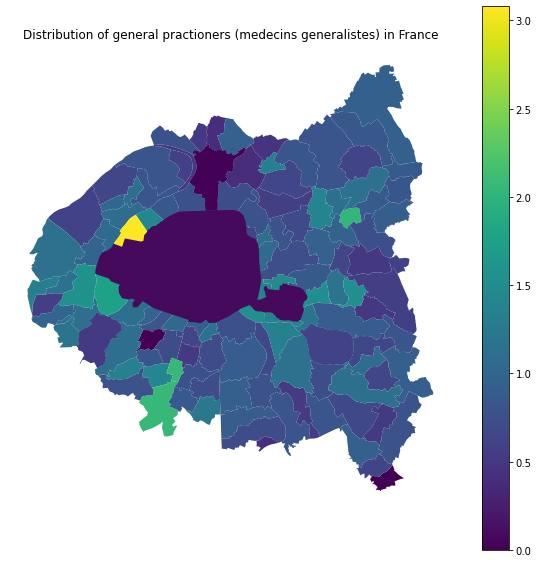

In [23]:
doctorsCom2Map = gpd.GeoDataFrame(doctorsCom2)

fig, ax = plt.subplots(1,1,figsize=[10,10])
doctorsCom2Map.plot(column='ratio', cmap=cm.viridis,
    legend=True, ax=ax)
ax.set_axis_off()
ax.set(title='Distribution of general practioners (medecins generalistes) in France')
plt.show()


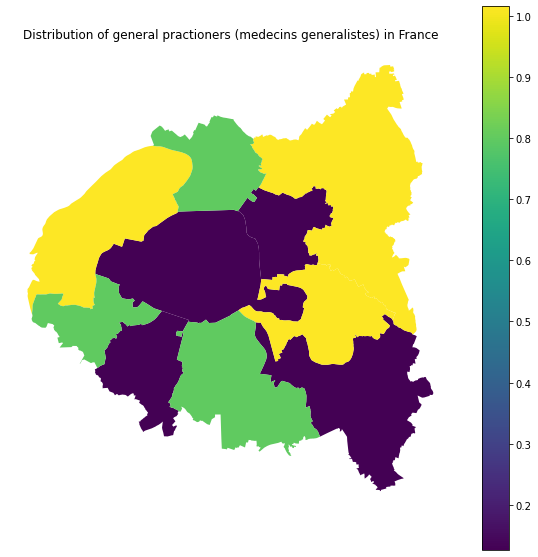

In [24]:
doctorsCom3Map = gpd.GeoDataFrame(doctorsCom3)

fig, ax = plt.subplots(1,1,figsize=[10,10])
doctorsCom3Map.plot(column='ratio', cmap=cm.viridis,
    legend=True, ax=ax)
ax.set_axis_off()
ax.set(title='Distribution of general practioners (medecins generalistes) in France')
plt.show()